# Phase 1 – Single-Qubit Rabi Oscillations

In this notebook we look at Rabi oscillations for a single qubit.  
Starting from the Hamiltonian in our Phase 1 notes, we simplify to the on-resonance form

$$
H = \frac{\Omega}{2}\,\sigma_x,
$$

which causes the qubit to oscillate between $|0\rangle$ and $|1\rangle$.

We compute the probability of being in $|1\rangle$ in two ways:

1. Using the time-evolution operator  
   $$U(t) = e^{-iHt}.$$
2. Using a Qiskit circuit with  
   $$U(t) = R_x(\Omega t).$$

Both results are compared to the analytic formula  
$$P_1(t) = \sin^2\!\left(\frac{\Omega t}{2}\right).$$

The goal is simply to show that all three methods match and describe the same Rabi oscillation.


## 1. Theory Recap

### General Hamiltonian from the notes

In the PDF, we derived that any 2×2 Hermitian Hamiltonian can be written as

$$
H = E_{\text{avg}}\, I + \Delta\, \sigma_z + \Omega\, \sigma_x.
$$

Where:

- $E_{\text{avg}} \rightarrow$ shifts both energy levels equally (this only adds a global phase)
- $\Delta \rightarrow$ represents detuning along the $z$-axis  
- $\Omega \rightarrow$ is the coupling strength along the $x$-axis (responsible for transitions)

### Simplifying Hamiltonian for Phase 1

To observe Rabi oscillations, we focus on the **on-resonance** case. Meaning we 
remove the detuning between the two states. Allowing us to efficiently 
manipulate the state of the qubit. 

This means:

- set detuning to zero:
  
  $$
  \Delta = 0
  $$
  
- ignore the global energy shift:
  
  $$
  E_{\text{avg}} = 0
  $$

so the Hamiltonian reduces to

$$
H = \Omega\, \sigma_x.
$$

### Adjusting the Hamiltonian for correct Bloch-sphere rotation

Hamiltonian $H = \Omega\,\sigma_x$ does not produce the
rotation angle we want on the Bloch sphere. 

To fix this, we scale the Hamiltonian by $1/2$:

$$
H = \frac{\Omega}{2}\,\sigma_x.
$$

Scaling the Hamiltonian simply rescales the time parameter in the evolution
operator $U(t) = e^{-iHt}$, so the underlying physics doesn’t change. What this
scaling *does* achieve is that the qubit now rotates by an angle $\Omega t$ on the
Bloch sphere, which is the convention typically used for single-qubit rotations.

Lines up with the way Qiskit defines the $R_x$ gate:

$$
R_x(\theta) = e^{-i(\theta/2)\sigma_x},
$$

so the time evolution under our Hamiltonian corresponds to

$$
U(t) = R_x(\Omega t).
$$

### What we will compute

We start the qubit in

$$
|\psi(0)\rangle = |0\rangle,
$$

and evolve it under the Hamiltonian:

$$
|\psi(t)\rangle = U(t)\,|0\rangle.
$$

The probability of being in $|1\rangle$ at time $t$ is

$$
P_1(t) = \big| \langle 1 \mid \psi(t) \rangle \big|^2.
$$

From the analytic derivation, we expect (in the on-resonance case):

$$
P_1(t) = \sin^2\!\left( \frac{\Omega t}{2} \right).
$$

One of the goals of this notebook is to reproduce this curve numerically and then show how the *same oscillations* appear when we implement them as a circuit using Qiskit’s `Rx` gate.


## 2. Simulating Rabi Oscillations Using the Time Evolution Operator

Now that we’ve defined the Hamiltonian we’re working with,

$$
H = \frac{\Omega}{2}\,\sigma_x,
$$

we can directly compute the time evolution of the qubit using the Schrödinger equation solution:

$$
U(t) = e^{-iHt}.
$$

For a chosen value of $\Omega$, this operator tells us how the qubit state evolves over time.

### What we are actually going to compute

We start the system in the state

$$
|\psi(0)\rangle = |0\rangle,
$$

then evolve it under the Hamiltonian:

$$
|\psi(t)\rangle = U(t)\,|0\rangle.
$$

From this state, we compute the probability of measuring $|1\rangle$:

$$
P_1(t) = \big| \langle 1 \mid \psi(t) \rangle \big|^2.
$$

If our implementation is correct, the numerically computed $P_1(t)$ should match the analytic prediction:

$$
P_1(t) = \sin^2\!\left( \frac{\Omega t}{2} \right).
$$

### The code that follows

1. Computes the time-evolution operator $U(t) = e^{-iHt}$ for many values of $t$.
2. Applies $U(t)$ to the initial state $|0\rangle$ to get $|\psi(t)\rangle$.
3. Extracts the probability of being in $|1\rangle$.
4. Plots this numeric probability next to the analytic formula  
   $$P_1(t) = \sin^2\!\left(\frac{\Omega t}{2}\right).$$

Seeing the two curves overlap confirms that our Hamiltonian and time-evolution implementation are correct.



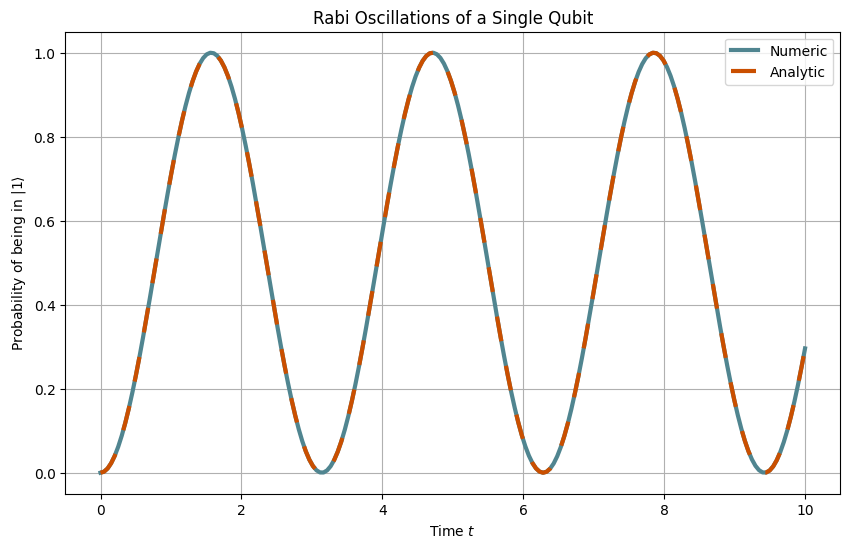

In [ ]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Define Pauli-X and Identity matrices
X = np.array([[0,1],[1,0]], dtype=complex)
I = np.eye(2, dtype=complex)

# Rabi Frequency
Omega = 2.0

# Define the Hamiltonian for a single qubit
H = 0.5 * Omega * X

# Basis states |0> and |1>
ket_0 = np.array([1+0j, 0+0j])
ket_1 = np.array([0+0j, 1+0j])

# Time evolution grid
t_max = 10.0
num_points = 200
times = np.linspace(0, t_max, num_points)

probs_numeric = []
probs_analytic = []

for t in times:
    # Our time evolution operator
    U_t = expm(-1j * H * t)
    # Evolve the initial state |0>
    ket_t = U_t @ ket_0
    # Probability of being in state |1>
    p1 = np.abs(ket_t[1])**2
    # Store the probability
    probs_numeric.append(p1)
    # Analytic solution for comparison
    p1_analytic = np.sin(0.5 * Omega * t)**2
    # Store the analytic probability
    probs_analytic.append(p1_analytic)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(times, probs_numeric, label='Numeric', linewidth=3, color='#508590')
plt.plot(times, probs_analytic, label='Analytic', linestyle=(0, (6, 6)), linewidth=3, color='#CA4F00')
plt.title('Rabi Oscillations of a Single Qubit')
plt.xlabel('Time $t$')
plt.ylabel('Probability of being in $|1\\rangle$')
plt.legend()
plt.grid(True)
plt.show()

## 3. Reproducing Rabi Oscillations with Qiskit

We previously computed the time evolution of a qubit under the Hamiltonian

$$
U(t) = e^{-i H t}
$$

and from that we got the probability

$$
P_1(t) = \big|\langle 1 \mid \psi(t) \rangle\big|^2
$$

for the state evolved from $\lvert 0 \rangle$.

Now we will show that this same time evolution can be reproduced using a Qiskit circuit built from standard gates.

$$
H = \frac{\Omega}{2}\,\sigma_x
\quad \Rightarrow \quad
U(t) = e^{-i H t} = e^{-i (\Omega t / 2)\,\sigma_x} = R_x(\Omega t).
$$

For a given time $t$, we can just apply an `Rx` gate with angle

$$
\theta = \Omega t
$$

to $\lvert 0 \rangle$, and the result should be the same.

### What the code below does

In the code below, we:

1. Loop over the same set of `times` that we used in the matrix simulation.
2. For each time $t$, build a one-qubit Qiskit circuit that:
   - starts in $\lvert 0 \rangle$,
   - applies `rx(Omega * t)` to the qubit.
3. Use the statevector simulator to get the final state and extract the probability of being in $\lvert 1 \rangle$.
4. Plot these Qiskit probabilities on top of the analytic curve
   $$
   P_1(t) = \sin^2\!\left(\frac{\Omega t}{2}\right).
   $$

If everything is consistent, the Qiskit curve should sit right on top of the analytic one.


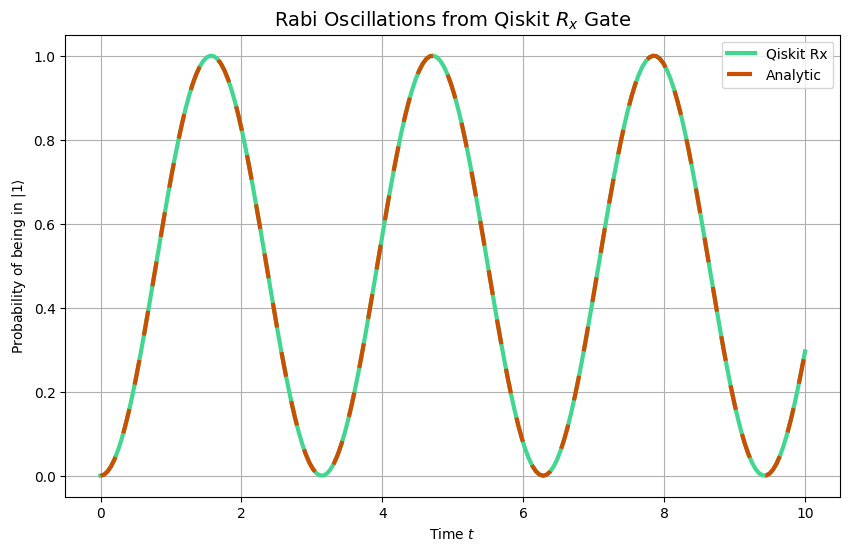

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

probs_qiskit = []

for t in times:
    theta = Omega * t

    # Build a 1-qubit circuit. start in |0>, apply Rx(theta)
    qc = QuantumCircuit(1)
    qc.rx(theta, 0)

    # Use the statevector simulator to get the final state
    state = Statevector.from_label("0").evolve(qc)

    # Probability of being in |1>
    p1 = np.abs(state.data[1])**2
    probs_qiskit.append(p1)

# Plotting Result
plt.figure(figsize=(10, 6))

# Qiskit curve
plt.plot(
    times,
    probs_qiskit,
    label='Qiskit Rx',
    linewidth=3,
    color="#43D691"
)
# Analytic curve
plt.plot(
    times,
    probs_analytic,
    label='Analytic',
    linestyle=(0, (6, 6)),
    linewidth=3,
    color='#CA4F00'
)

plt.title('Rabi Oscillations from Qiskit $R_x$ Gate', fontsize=14)
plt.xlabel('Time $t$')
plt.ylabel('Probability of being in $|1\\rangle$')
plt.legend()
plt.grid(True)
plt.show()


## 4. Summary

We modeled a two-level system using the Hamiltonian

$$
H = \frac{\Omega}{2}\,\sigma_x.
$$

By evolving $|0\rangle$ under this Hamiltonian, we got the expected Rabi
oscillation:

$$
P_1(t) = \sin^2\!\left(\frac{\Omega t}{2}\right).
$$

We then reproduced the same behavior in Qiskit using:

$$
U(t) = e^{-iHt} = R_x(\Omega t).
$$

The matrix simulation, analytic formula, and Qiskit circuit all matched.